In [1]:
import scIB

In [2]:
import scanpy as sc

In [3]:
import SAUCIE

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [38]:
adata = sc.read('/storage/groups/ml01/workspace/scIB/simulations_1_1/sim1_1_norm.h5ad')

In [8]:
adata

AnnData object with n_obs × n_vars = 12097 × 9979 
    obs: 'Cell', 'Batch', 'Group', 'ExpLibSize', 'sum', 'detected', 'percent_top_50', 'percent_top_100', 'percent_top_200', 'percent_top_500', 'total', 'Discard', 'size_factors'
    var: 'Gene', 'BaseGeneMean', 'OutlierFactor', 'GeneMean', 'BatchFacBatch1', 'BatchFacBatch2', 'BatchFacBatch3', 'BatchFacBatch4', 'BatchFacBatch5', 'BatchFacBatch6', 'DEFacGroup1', 'DEFacGroup2', 'DEFacGroup3', 'DEFacGroup4', 'DEFacGroup5', 'DEFacGroup6', 'DEFacGroup7', 'mean', 'detected'
    layers: 'counts'

In [5]:
saucie = SAUCIE.SAUCIE(adata.X.shape[1])

W0728 23:29:22.220131 140542310590272 deprecation_wrapper.py:119] From /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/SAUCIE/model.py:61: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 23:29:22.244321 140542310590272 deprecation.py:323] From /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/SAUCIE/model.py:152: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0728 23:29:22.247167 140542310590272 deprecation.py:506] From /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to t

In [8]:
loader = SAUCIE.Loader(adata.X.todense(), labels=adata.obs.batch)

In [9]:
saucie.train(loader, steps=1000)

In [10]:
embedding = saucie.get_embedding(loader)

In [11]:
corrected = saucie.get_reconstruction(loader)

In [13]:
corrected[0]

array([[ 1.4411391e-01,  1.3693626e-01,  1.0125791e-01, ...,
        -5.4079918e-03, -5.1650219e-05, -3.0549180e-03],
       [ 7.1466756e-01,  4.8899522e-01,  2.2739609e-01, ...,
        -1.2173108e-03,  1.6469061e-03, -5.6891181e-03],
       [ 9.6726060e-02,  1.2923352e-01,  6.9325790e-02, ...,
        -6.3553429e-03, -1.7275382e-04, -2.2908954e-03],
       ...,
       [ 1.4580421e-02,  3.3932630e-02,  1.0987879e-02, ...,
        -3.6518222e-03, -1.6534433e-03, -3.4409692e-04],
       [ 1.1402022e-02,  1.8314252e-02, -3.9667897e-03, ...,
        -4.8570298e-03, -6.2483782e-03,  1.5465447e-03],
       [ 2.2926980e-01,  1.4970228e-01,  8.1797235e-02, ...,
        -3.2591159e-03, -9.0518501e-05, -1.8374717e-03]], dtype=float32)

In [16]:
saucie=None

In [11]:
import pandas as pd

In [133]:
def runSaucie(adata, batch):
    expr = adata.X.todense()
    saucie = SAUCIE.SAUCIE(adata.X.shape[1], lambda_b=1)
    loader = SAUCIE.Loader(expr, labels=adata.obs[batch].cat.codes, shuffle=True)
    #for i in range(20):
    saucie.train(loader, steps=2000)
    #print('iteration '+str(i))
    ret = adata.copy()
    ret.obsm['X_emb'] = saucie.get_embedding(loader)[0]
    ret.X = saucie.get_reconstruction(SAUCIE.Loader(expr, labels=adata.obs[batch].cat.codes))[0]
    
    return ret
    
    

In [134]:
import tensorflow as tf
tf.reset_default_graph()

In [135]:
integrated = runSaucie(adata, 'Batch')

In [111]:
integrated.obsm['X_emb']

array([[62.469273,  8.285374],
       [62.528095,  8.212034],
       [64.307106,  9.327104],
       ...,
       [64.84406 , 11.541928],
       [65.67984 ,  8.431269],
       [63.115112,  7.98021 ]], dtype=float32)

In [41]:
scIB.pp.reduce_data(adata)

HVG
Calculating 2000 HVGs for reduce_data.
Computed 1999 highly variable genes
PCA
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/rp_tree.py (457)

File "../../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving cal

UMAP


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 30 separate connected components using meta-embedding (experimental)
  n_components


In [136]:
scIB.pp.reduce_data(integrated, use_rep='X_pca')

HVG
Calculating 2000 HVGs for reduce_data.
Computed 2000 highly variable genes
PCA
Nearest Neigbours


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


UMAP


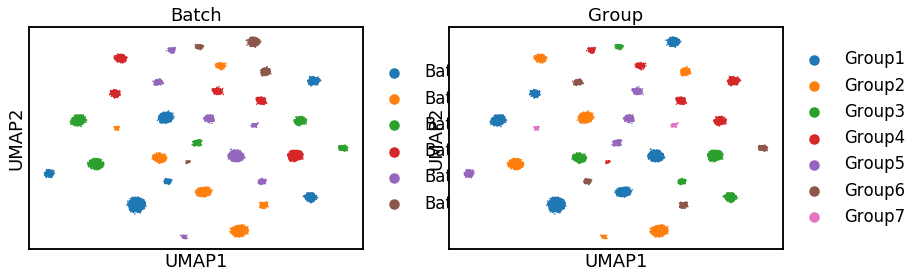

In [42]:
sc.pl.umap(adata, color=['Batch', 'Group'])

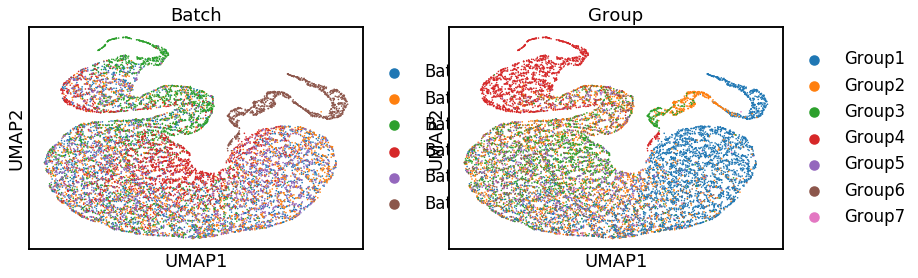

In [137]:
sc.pl.umap(integrated, color=['Batch', 'Group'])

In [114]:
embedding = integrated.obsm['X_emb']

In [63]:
import matplotlib.pyplot as plt

In [138]:
embedding

array([[62.469273,  8.285374],
       [62.528095,  8.212034],
       [64.307106,  9.327104],
       ...,
       [64.84406 , 11.541928],
       [65.67984 ,  8.431269],
       [63.115112,  7.98021 ]], dtype=float32)

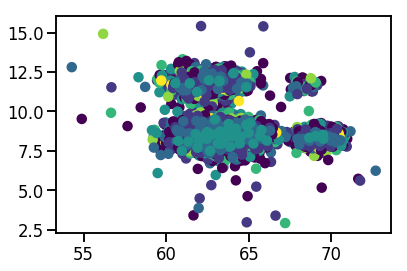

In [140]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(embedding[:, 0], embedding[:, 1], c=integrated.obs.Group.cat.codes)
fig.savefig('embedding_by_cluster.png')